# TensorFlow Classifier Model (Supervize Learning)
Using datasets-> Fashion Mnist

## Preparation

### import basic library

In [1]:
import os
from tensorflow import keras
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# allow to plot inside cells
%matplotlib inline

In [3]:
a = softmax([np.linspace(-3,0,10)])
np.argmax(a)
print(a)
print(np.sum(a))

[array([0.01463517, 0.02042503, 0.02850542, 0.03978252, 0.05552097,
       0.07748576, 0.10814009, 0.15092166, 0.21062814, 0.29395525])]
1.0


#### Display library version

In [4]:
for module in (mpl, np, pd, sklearn, tf, keras):
    print(module.__name__, "Version: ", module.__version__)

matplotlib Version:  3.1.0
numpy Version:  1.16.4
pandas Version:  0.24.2
sklearn Version:  0.21.2
tensorflow Version:  2.0.0-alpha0
tensorflow.python.keras.api._v2.keras Version:  2.2.4-tf


### Import Datasets

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# print dataset Shape
for dataset in x_train_all, y_train_all, x_test, y_test:
    print(dataset.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


##### firstly keras helps to download the dataset and after downloading we need to split the data into training set and the validation set
### warning remember to do the same to the labels

In [6]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]


print("training: \n", x_train.shape, y_train.shape)
print("validation: \n", x_valid.shape, y_valid.shape)
print("test: \n", x_test.shape, y_test.shape)

training: 
 (55000, 28, 28) (55000,)
validation: 
 (5000, 28, 28) (5000,)
test: 
 (10000, 28, 28) (10000,)


## Plot

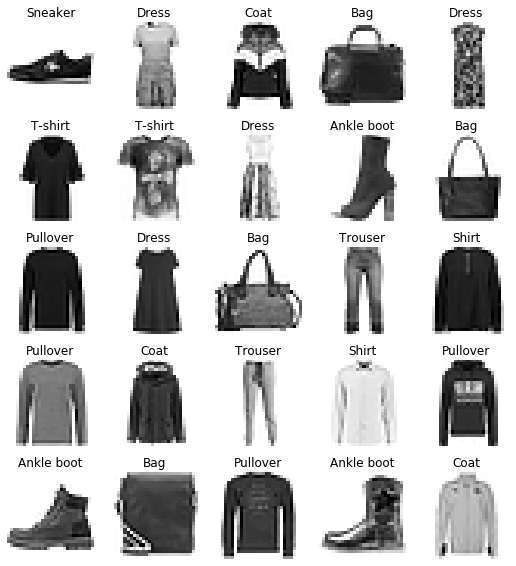

In [7]:
def show_datasets(data, label, rows, cols):

    class_name = [
        'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
    plt.figure(figsize=(cols*1.8, rows*2.0))
    for row in range(rows):
        for col in range(cols):
            plt.subplot(rows, cols, cols * row + col + 1)
            random_pic = np.random.randint(0, label.shape[0])
            plt.imshow(data[random_pic], cmap='binary')
            plt.axis('off')
            plt.title(class_name[label[random_pic]])
    plt.show()


# 调用函数
show_datasets(x_train, y_train, 5, 5)

## Build Model
Useing
```py
tf.keras.models.Sequential()
```
to build model  

#### [TensorFlow Office API Documents for Sequential](https://tensorflow.google.cn/versions/r2.0/api_docs/python/tf/keras/Sequential)

The nature of **Sequential()** is to stack all the layer together.!
> **`layers`**: list of layers to add to the model.

### Building an Object

In [8]:
# 创建一个Sequential对象
'''
model = tf.keras.models.Sequential()
# 调用Sequential对象的.add方法，添加神经网络层
model.add(keras.layers.Flatten(input_shape=[28 , 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
'''

Another way to write it，每次不用再调用.add方法可以直接写成一个list
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28 , 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(10 , activation = "softmax")
])

- $ReLU: y = max (0 , x)$
****

- $Softmax$函数把一个向量变成一个概率分布  
假设$y =  \begin{bmatrix} x1 & x2 & x3 \end{bmatrix}$  
$softmax(x): y = [\frac{e ^ {x1}}  {sum(x)} , \frac{e^{x2}} {sum(x)} , \frac{e^{x3}} {sum(x)}] $  
并且$sum(softmax(x)) = 1$

### Compile the model
```py
model.compile()
```
#### Pameraters
- `loss` loss function  
    use**sparse_categorical_crossentropy**because label --> index.  
    We need to make labels to percentage distribution  
    And it looks like this
    ```py
    np.identity(10)
    >>> array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
       ```
       
 if the labels theirselves are already one-hot coding, just change the loss fucction to  
 **categorical_crossentropy**
 - `optimizer` 
     sgd: Stochastic Gradient Descent
     
- `matrics`  
    List of metrics to be evaluated by the model during training
    and testing. Typically you will use `metrics=['accuracy']`.     

In [14]:

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics=["accuracy"]
             )

### Inspect built model

In [15]:

model.layers

In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Train Model
call`fit()` method to train model

In [12]:
history = model.fit(x = x_train , y = y_train , 
          epochs=10,
         validation_data = (x_valid , y_valid)
         )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 43us/sample - loss: 2.1624 - accuracy: 0.6920 - val_loss: 0.7352 - val_accuracy: 0.7512
Epoch 2/10
55000/55000 [==============================] - 2s 31us/sample - loss: 0.6551 - accuracy: 0.7573 - val_loss: 0.6902 - val_accuracy: 0.7614
Epoch 3/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.5632 - accuracy: 0.7911 - val_loss: 0.6482 - val_accuracy: 0.8064
Epoch 4/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5105 - accuracy: 0.8187 - val_loss: 0.5652 - val_accuracy: 0.8200
Epoch 5/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4721 - accuracy: 0.8303 - val_loss: 0.5905 - val_accuracy: 0.8060
Epoch 6/10
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4523 - accuracy: 0.8377 - val_loss: 0.5448 - val_accuracy: 0.8270
Epoch 7/10
55000/55000 [==============================] 

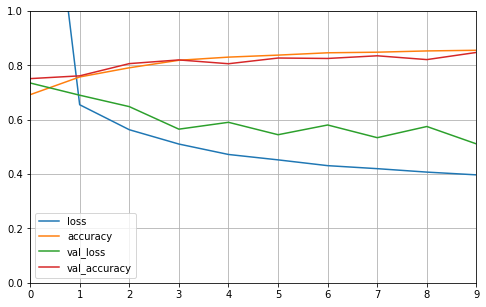

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)    